In [14]:
import numpy as np

# Load train.csv and test.csv
train = np.loadtxt('train.csv', skiprows=1, delimiter=',')
test = np.loadtxt('test.csv', skiprows=1, delimiter=',')

In [15]:
# Split train.csv into train and validation
train_images = train[:, 1:]
train_labels = train[:, 0]
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images / 255.0
validation_images = train_images[:10000]
validation_labels = train_labels[:10000]

print(train_images.shape)
print(validation_images.shape)

train_images

(42000, 28, 28, 1)
(10000, 28, 28, 1)


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Epoch 1/40
1313/1313 [==============================] - 23s 17ms/step - loss: 0.1818 - accuracy: 0.9430 - val_loss: 0.0500 - val_accuracy: 0.9839
Epoch 2/40
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0526 - accuracy: 0.9828 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 3/40
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0367 - accuracy: 0.9880 - val_loss: 0.0242 - val_accuracy: 0.9919
Epoch 4/40
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0273 - val_accuracy: 0.9916
Epoch 5/40
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0161 - val_accuracy: 0.9959
Epoch 6/40
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0180 - val_accuracy: 0.9943
Epoch 7/40
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0070 -

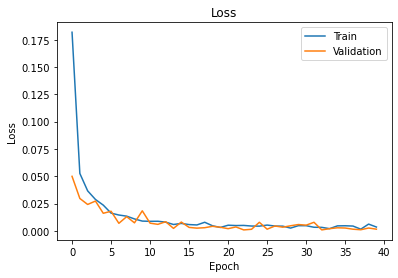

In [12]:
from keras.layers import Dense
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt


# Create the model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=40, validation_data=(validation_images, validation_labels))

# Plot the loss of train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


In [13]:
# Create predictions for test.csv
test_images = test.reshape((test.shape[0], 28, 28, 1))
test_images = test_images / 255.0
predictions = model.predict(test_images)

# Save predictions to a csv file
with open('submission.csv', 'w') as f:
    f.write('ImageId,Label\n')
    for i, p in enumerate(predictions):
        f.write('{},{}\n'.format(i+1, np.argmax(p)))

875/875 [==============================] - 5s 6ms/step
